In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Data cleaning
data_cleaner = [df_train, df_test]
drop = ['PassengerId', 'Ticket', 'Cabin']

for data in data_cleaner:
    # Fill NA 
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    
    # Drop Columns
    data.drop(drop, axis=1, inplace=True)

In [7]:
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
df_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
# Create New Features
for data in data_cleaner:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlong'] = 1
    data['IsAlong'].loc[data['FamilySize'] > 1] = 0
    
    data['Title'] = data['Name'].str.extract(r' (\w+)\.')
    
    data['FareBin'] = pd.qcut(data['Fare'], 4)
    data['AgeBin'] = pd.cut(data['Age'].astype(int), 5)

In [10]:
[df_train.Title.value_counts(), df_test.Title.value_counts()]

[Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Col           2
 Major         2
 Mlle          2
 Don           1
 Capt          1
 Mme           1
 Lady          1
 Jonkheer      1
 Sir           1
 Countess      1
 Ms            1
 Name: Title, dtype: int64, Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Dona        1
 Dr          1
 Ms          1
 Name: Title, dtype: int64]

In [11]:
# Cleanup rare title names
for data in data_cleaner:
    title_names = (data['Title'].value_counts() < 10)
    data['Title'] = data['Title'].apply(lambda x: 'Other' if title_names.loc[x] == True else x)
    
[df_train.Title.value_counts(), df_test.Title.value_counts()]

[Mr        517
 Miss      182
 Mrs       125
 Master     40
 Other      27
 Name: Title, dtype: int64, Mr        240
 Miss       78
 Mrs        72
 Master     21
 Other       7
 Name: Title, dtype: int64]

In [12]:
[df_train.info(), df_test.info()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlong       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
E

[None, None]

In [13]:
# Convert Format
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for data in data_cleaner:
    data['Sex_Code'] = le.fit_transform(data['Sex'])
    data['Embarked_Code'] = le.fit_transform(data['Embarked'])
    data['Title_Code'] = le.fit_transform(data['Title'])
    data['AgeBin_Code'] = le.fit_transform(data['AgeBin'])
    data['FareBin_Code'] = le.fit_transform(data['FareBin'])

In [14]:
# Model Training
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, gaussian_process

x_label = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code', 'IsAlong']
y_label = ['Survived']

X_train = df_train[x_label]
Y_train = df_train[y_label]

# Train test split
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.6, random_state=0)

# Machine Learning Algorithms
MLA = [
    # Ensemble Models
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # Linear Models
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    
    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
]

# Create a table to record MLA
columns = ['MLA_Name', 'MLA_Parameters','Train_Accuracy', 'Test_Accuracy', 'Time']
MLA_compare = pd.DataFrame(columns=columns)

i = 0
for alg in MLA:
    cv_res = model_selection.cross_validate(alg, X_train, Y_train, cv=cv_split)
        
    MLA_compare.loc[i, 'MLA_Name'] = alg.__class__.__name__
    MLA_compare.loc[i, 'MLA_Parameters'] = str(alg.get_params())
    MLA_compare.loc[i, 'Train_Accuracy'] = cv_res['train_score'].mean()
    MLA_compare.loc[i, 'Test_Accuracy'] = cv_res['test_score'].mean()
    MLA_compare.loc[i, 'Time'] = cv_res['fit_time'].mean()
    
    i += 1

MLA_compare.sort_values(by=['Test_Accuracy'], ascending=False, inplace=True)
MLA_compare

,MLA_Name,MLA_Parameters,Train_Accuracy,Test_Accuracy,Time
11,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.838015,0.827239,0.0113409
12,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.837079,0.827239,0.0355062
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.890262,0.822388,0.00907359
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.867041,0.821642,0.0853429
14,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.821269,0.00220015
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.890824,0.818657,0.0102671
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.818284,0.0110761
10,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.848876,0.81306,0.00468752
15,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.810821,0.00219917
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820599,0.810075,0.0496204


Text(0, 0.5, 'Algorithm')

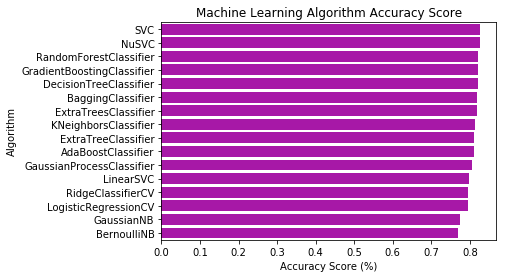

In [18]:
sns.barplot(x='Test_Accuracy', y='MLA_Name', data=MLA_compare, color='m')
plt.title('Machine Learning Algorithm Accuracy Score')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [19]:
# Model Tuning
# SVM
param = [{
    'C': [0.1, 0.5, 1, 2, 3],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1]
}]

MT = model_selection.GridSearchCV(estimator=svm.SVC(), param_grid = param, cv=cv_split)
MT.fit(X_train, Y_train)
MT.best_params_

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [48]:
SVM = svm.SVC(C=0.5, gamma=0.1, kernel='rbf')
cv_res = model_selection.cross_validate(SVM, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8348314606741573, 0.8283582089552238]

In [23]:
# Random Forests
param = [{
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}]

MTRF = model_selection.GridSearchCV(estimator=ensemble.RandomForestClassifier(), param_grid=param, cv=cv_split)
MTRF.fit(X_train, Y_train)
MTRF.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [30]:
RF = ensemble.RandomForestClassifier(max_depth=None,
                                     max_features='sqrt',
                                     min_samples_leaf=1,
                                     min_samples_split=5,
                                     n_estimators=200)
cv_res = model_selection.cross_validate(RF, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8833333333333334, 0.8350746268656716]

In [33]:
# Gradient Boosting
param = [{
    'learning_rate': [0.01, 0.025, 0.05, 0.1, 0.5],
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6, None]
}]

MTGBM = model_selection.GridSearchCV(estimator=ensemble.GradientBoostingClassifier(), param_grid=param, cv=cv_split)
MTGBM.fit(X_train, Y_train)
MTGBM.best_params_

{'learning_rate': 0.025, 'max_depth': 2, 'n_estimators': 200}

In [35]:
GBM = ensemble.GradientBoostingClassifier(learning_rate=0.025,
                                          max_depth=2,
                                          n_estimators=200)
cv_res = model_selection.cross_validate(GBM, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8391385767790261, 0.8298507462686567]

In [36]:
# Decision Tree
param = [{
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']    
}]

MTDT = model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param, cv=cv_split)
MTDT.fit(X_train, Y_train)
MTDT.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [39]:
DT = tree.DecisionTreeClassifier(max_depth=None,max_features='auto',min_samples_leaf=1,min_samples_split=5)
cv_res = model_selection.cross_validate(DT, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8737827715355806, 0.8115671641791045]

In [41]:
# Bagging
param = [{
    'n_estimators': [100, 200, 300],
    'max_samples': [.1, .25, .5, .75, 1.0]
}]

MTB = model_selection.GridSearchCV(estimator=ensemble.BaggingClassifier(), param_grid=param, cv=cv_split)
MTB.fit(X_train, Y_train)
MTB.best_params_

{'max_samples': 0.5, 'n_estimators': 100}

In [44]:
BAG = ensemble.BaggingClassifier(max_samples=0.5, n_estimators=100)
cv_res = model_selection.cross_validate(BAG, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8840823970037454, 0.8279850746268658]

In [42]:
# KNN
param = [{
    'n_neighbors': [1,2,3,4,5,6,7], 
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}]

MTB = model_selection.GridSearchCV(estimator=neighbors.KNeighborsClassifier(), param_grid=param, cv=cv_split)
MTB.fit(X_train, Y_train)
MTB.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

In [46]:
KNN = neighbors.KNeighborsClassifier(algorithm='auto', n_neighbors=7, weights='distance')
cv_res = model_selection.cross_validate(KNN, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8945692883895131, 0.8201492537313433]

In [43]:
# AdaBoost
param = [{
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.025, 0.05, 0.1, 0.5],
    'algorithm': ['SAMME', 'SAMME.R']
}]

MTB = model_selection.GridSearchCV(estimator=ensemble.AdaBoostClassifier(), param_grid=param, cv=cv_split)
MTB.fit(X_train, Y_train)
MTB.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 200}

In [47]:
ADA = ensemble.AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.05, n_estimators=200)
cv_res = model_selection.cross_validate(ADA, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8323970037453184, 0.8298507462686567]

In [50]:
# Voting
vote_set = [
    ('svm', SVM),
    ('rf', RF),
    ('gbm', GBM),
    ('dt', DT),
    ('bag', BAG),
    ('knn', KNN),
    ('ada', ADA)
]

hard = ensemble.VotingClassifier(estimators=vote_set, voting='hard')
cv_res = model_selection.cross_validate(hard, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8773408239700375, 0.8384328358208955]

In [51]:
soft = ensemble.VotingClassifier(estimators=vote_set, voting='soft')
cv_res = model_selection.cross_validate(hard, X_train, Y_train, cv=cv_split)
[cv_res['train_score'].mean(), cv_res['test_score'].mean()]

[0.8794007490636705, 0.8380597014925373]

In [55]:
# Predict with hard voting
hard.fit(X_train, Y_train)
pred = hard.predict(df_test[x_label])
result = pd.read_csv('gender_submission.csv')
result = pd.DataFrame({'PassengerId': result.PassengerId, 'Survived':pred})
result.to_csv('submission.csv',index=False)